# Le dilemme du prisonnier

Auteur : Philippe Mathieu, CRISTAL Lab, SMAC Team, University of Lille, email : philippe.mathieu@univ-lille.fr

Contributeurs : Louisa Fodil (CRISTAL/SMAC)

Creation : 18/01/2018

## Introduction

La théorie des jeux est la discipline qui étudie de manière formelle les interactions que peuvent avoir plusieurs individus dans une situation conflictuelle. Le terme "jeu" n'a a priori rien de ludique, Von Neumann l'ayant par exemple développée pour la modélisation des relations Franco-Américaines de 1945 et notamment lors de l'épisode de la baie des cochons. La théorie des jeux décompose les jeux en fonction du nombre de joueurs (généralement 2), puis principalement en deux grandes familles : les jeux simultanés, dans lesquels les joueurs jouent simultanément et donc ne savent pas en jouant ce que joue l'adversaire (papier-feuiile-ciseaux par exemple) et les jeux non simultanés où chacun joue tour à tour (les échecs par exemple). 

Nous nous plaçons ici dans le cadre des **jeux à deux joueurs, simultanés**. On représente en général ce type de jeu par une matrice de gains. Les coups d'un des deux joueurs se trouvent en abscisse et ceux de l'autre en ordonnée. A l'intersection de chaque case, correspondant à une situation, on note les points qui seront distribués à chacun. La théorie décompose encore ces deux en deux autres familles, les jeux à somme nulle dans lesquels tout se que perd l'un est gagné par l'autre, et les jeux à somme non nulle dans lesquels les points distribués sont différents selon les coups joués. Nous sommes ici dans un jeu **à somme non nulle**.

Les économistes se sont très vite emparés de ces modèles pour étudier différents problèmes économiques. Afin d'identifier la meilleure manière de jouer à un jeu fixé, ils se sont basés sur la notion abstraite de rationalité du joueur. Partant du principe que, dans le pire des cas, l'adversaire est aussi rationnel, le raisonnement que je m'applique doit donc aussi être appliqué à mon adversaire. très vite, deux définitions de la rationalité sont apparues, définissant ainsi un (ou éventuellement plusieurs) point fixe d'un jeu, point vers lequel rationnellement, si tout le monde réfléchis de manière identique, on parviendra :
1. *L'équilibre de Nash*, du nom de son inventeur, John Nash. L'équilibre de Nash est une situation de non regret de chacun des joueurs. *"nous avons joué simultanément, mais maintenant que je sais ce que l'autre a joué, je n'ai aucun regret"*
2. *L'optimum de Pareto*, du nom de son inventeur, Wilfried Pareto. l'optimum de Pareto est une situation où aucune situation n'est supérieure pour les deux joueurs, et donc ils n'ont aucun interêt collectivement à changer.

Le Dilemme du prisonnier, identifié par M. Flood and M. Dresher de la Rand Corporation en 1950, est un modèle de théorie des jeux spécialement créé pour montrer que l'équilibre de Nash n'est pas toujours une bonne idée.

Cette feuille a pour objectif de montrer comment établir et comparer des stratégies à ce jeu.
On trouvera plus de détails sur [Wikipedia](http://www.wikidedia.org)


# Une matrice de gains

Tout d'abord, il est necessaire de pouvoir coder une matrice de gains. Une classe `Game` va nous
permettre de stocker les gains des deux joueurs pour une situation donnée. 
Un objet Game prend un tableau de couples en paramètre, correspondant aux scores de chaque issue, ainsi que le tableau des noms des actions correspondantes.
En interne, Le package *numpy* offre un objet `Array` idéal pour stocker et manipuler cela. Pour un jeu à `n` coups, nous créons un Array `n*n` de couples de valeurs `(x,y)` avec `x` le gain du joueur 1 et `y` le gain du joueur 2. 

Cette classe doit permettre aussi de fournir le ou les équilibres potentiels.
Pour calculer la situation de "non regret" correspondant à l'équilibre de Nash il suffit de noter les réponses du joueur1 les plus adaptés à chaque stratégie du joueur 2 (donc calculer les max(x) dans la chaque colonne), puis calculer les meilleures réponses du joueur 2 aux stratégies du joueur 1 (donc calculer les max(y) dans chaque ligne). Si une issue possede 2 max, c'est un équilibre de Nash. Selon les jeux, il peut bien sûr y en avoir 1, plusieurs ou pas du tout. 
L'usage d'un `np.Array` facilite énormément les choses puisqu'il est possible d'avoir les vecteurs de valeurs max en ligne ou en colonne. Il suffit donc de fabriquer des matrices booléennes dans chaque cas et d'en faire un `ou` logique.


In [1]:
import numpy as np
import math

class Game:
    def __init__(self, tab, actions):
        self.actions=actions
        m=np.array(tab,dtype=[('x', 'int32'), ('y', 'int32')])
        self.size = int(math.sqrt(len(tab)))
        self.scores=m.reshape(self.size,self.size)

    def nash(self):
        max_x = np.matrix(self.scores['x'].max(0)).repeat(self.size, axis=0)
        bool_x = self.scores['x'] == max_x
        max_y = np.matrix(self.scores['y'].max(1)).transpose().repeat(self.size, axis=1)
        bool_y = self.scores['y'] == max_y
        bool_x_y = bool_x & bool_y
        return self.scores[bool_x_y]

    def isPareto(self, t, s):
        return True if (len(s)==0) else (s[0][0] <= t[0] or s[0][1] <= t[1]) and self.isPareto(t, s[1:])

    def pareto(self):
        res = []
        for s in self.scores:
            if(self.isPareto(s,self.scores)):
                res.append(s) 
        return res

In [3]:
dip =[(3,3),(0,5),(5,0),(1,1)]   # Dilemme du prisonnier : 1 equilibrium
gs=[(3,2),(1,1),(0,0),(2,3)]     # Guerre des sexes : 2 equilibria
mp=[(1,-1),(-1,1),(-1,1),(1,-1)] # matching pennies : 0 equilibrium
rpc=[(0,0),(-1,1),(1,-1),(1,-1),(0,0),(-1,1),(-1,1),(1,-1),(0,0)] # papier feuille ciseaux  : 0 equilibrium
g = Game(dip,['C','D'])
g.scores
g.nash()
#g.pareto()

array([(1, 1)], dtype=[('x', '<i4'), ('y', '<i4')])

## Amusons nous

### Créer une matrice de jeu au hasard

In [4]:
x = np.random.randint(0, 5, (3,3))
y = np.random.randint(0, 5, (3,3))
couples = [(a,b) for a,b in zip(x.flatten(),y.flatten())]
g = Game(couples, None)
print(g.scores)
print(g.nash())

[[(1, 3) (0, 3) (1, 2)]
 [(4, 1) (4, 4) (1, 3)]
 [(3, 1) (2, 4) (0, 3)]]
[(4, 4)]


### Générer toutes les matrices

En Python il est facile d'énumérer tous les jeux à 2 coups à partir de valeurs fixées. Par exemple tous jeux que l'on peut construire avec les valeurs 1 et 2.
La Librairie `itertools` fournit de nombreux itérateurs efficaces, notamment pour les combinaisons, permutations et produits cartésiens. Ici c'est le produit cartésien des valeurs qui nous interesse.
On peut ensuite par exemple compter combien de jeux ont 0,1 ou plusieurs équilibres de Nash.


In [5]:
import itertools;
import random;

def numberOfGames(valeurs, nbCoups):
    return len(valeurs)**((nbCoups**2)*2)

print(numberOfGames([1,2],2))

def enumAllGames(valeurs, nbCoups):
    res = [q for q in itertools.product([p for p in itertools.product(list(valeurs), repeat=2)], repeat=nbCoups**2)]
    return [[res[j][k] for k in range(nbCoups**2)] for j in range(len(res))]

n = enumAllGames([1,2],2)
print("Impression de 10 jeux aléatoires trouvés sur "+str(numberOfGames([1,2],2)))
for i in range (10):
    print(random.choice(n))
        
def countNashEquilibria(valeurs, coups):
    results = [Game(i,None).nash().size for i in enumAllGames(valeurs, coups)]
    return dict((i,results.count(i)) for i in set(results))

# Combien de jeux à 2 coups batis sur (1,2) on x equilbres de Nash
countNashEquilibria([1,2],2)

256
Impression de 10 jeux aléatoires trouvés sur 256
[(2, 1), (2, 1), (1, 1), (1, 2)]
[(2, 2), (2, 1), (2, 2), (1, 1)]
[(2, 2), (2, 1), (2, 1), (1, 2)]
[(2, 2), (1, 1), (1, 2), (1, 1)]
[(2, 2), (1, 1), (1, 1), (2, 2)]
[(1, 1), (1, 1), (1, 1), (2, 1)]
[(2, 1), (1, 2), (2, 2), (1, 1)]
[(2, 1), (2, 2), (2, 1), (2, 1)]
[(1, 2), (2, 1), (2, 2), (1, 2)]
[(1, 1), (2, 2), (1, 1), (1, 2)]


{0: 2, 1: 44, 2: 114, 3: 80, 4: 16}

# Trouver des jeux avec des contraintes particulières
Cherchons par exemple, les jeux à deux coups dont les valeurs sont prises dans (1,2) et qui ont exactement les mêmes equilibres nash et pareto

In [6]:
nbCoups=2
res = [q for q in itertools.combinations([p for p in itertools.product([0,1,3,5], repeat=2)], nbCoups**2)]
games = [[res[j][k] for k in range(nbCoups**2)] for j in range(len(res))]
print(str(len(games))+" jeux étudiés.")
r = []
for g in games:
    if ((sorted(Game(g,None).pareto()) == sorted(Game(g,None).nash().tolist())) and (len(set(g)) == len(g))):
        r.append(g)
r


1820 jeux étudiés.


TypeError: '>=' not supported between instances of 'numpy.ndarray' and 'numpy.ndarray'

# Une stratégie

Une stratégie a pour objectif de décider du coup à jouer. Outre la matrice des gains, les informations disponibles pour une stratégie sont les coups joués par lesd eux joueurs dans le passé. Les stratégies les plus simples sont bien évidemment les stratégies qui ne prennent pas en compte ce passé, comme les stratégies qui jouent périodiquement la même séquence de coups. Pour assurer un principe d'autonomie de chaque agent, une stratégie est bien sur capable de fournir son prochain coup, mais s'occupe elle-même de stocker ses précédents coups si necessaire.

Créons une classe de stratégies de ce type

In [7]:
class Strategy():
    def setMemory(self,mem):
        pass
    
    def getAction(self,tick):
        pass
    
    def __copy__(self):
        pass

    def update(self,x,y):
        pass
    

class Periodic(Strategy):
    def __init__(self, sequence, name=None):
        super().__init__()
        self.sequence = sequence.upper()
        self.step = 0
        self.name = "per_"+sequence if (name == None) else name

    def getAction(self,tick):
        return self.sequence[tick % len(self.sequence)]

    def clone(self):
        object = Periodic(self.sequence, self.name)
        return object

    def update(self,x,y):
        pass

In [8]:
s1 = Periodic("abc")
print(s1.name,end="\t")
for i in range (0,10):
    print(s1.getAction(i), end=' ')
# IL DOIT Y AVOIR 10 COUPS. çA COMMENCE PAR A ET çA FINIT PAR A    

per_abc	A B C A B C A B C A 

# Un meeting
Un meeting est une rencontre de deux stratégies durant un certain nombre de coups. Le score de chacune est la somme des scores obtenus lors de chaque coup, conformément à la matrice du jeu.

In [9]:
class Meeting :      
    def __init__(self,game,s1,s2,length=1000):
        self.game = game
        self.s1=s1.clone()
        self.s2=s2.clone()
        self.length=length
        
    def reinit(self):
        self.s1_score=0
        self.s2_score=0
        self.s1_rounds=""
        self.s2_rounds=""
    
    def run(self):
        self.reinit()
        for tick in range(0,self.length):
            c1=self.s1.getAction(tick).upper()
            c2=self.s2.getAction(tick).upper()
            self.s1_rounds+=c1
            self.s2_rounds+=c2
            self.s1.update(c1,c2)
            self.s2.update(c2,c1)
            act=self.game.actions
            self.s1_score+=self.game.scores['x'][act.index(c1),act.index(c2)]
            self.s2_score+=self.game.scores['y'][act.index(c1),act.index(c2)]

Une rencontre entre deux stratégies est triviale : on initialise un jeu, on crée 2 stratégies, et on les passe au Meeting.

In [10]:
dip =[(3,3),(0,5),(5,0),(1,1)]   # Dilemme du prisonnier
g = Game(dip,['C','D'])
s1=Periodic("CCD")
s2=Periodic("DDC")
m = Meeting(g,s1,s2,10)
m.run()
print(m.s1.name+"\t"+m.s1_rounds+" "+str(m.s1_score))
print(m.s2.name+"\t"+m.s2_rounds+" "+str(m.s2_score))
# ON DOIT AVOIR 15,35

per_CCD	CCDCCDCCDC 15
per_DDC	DDCDDCDDCD 35


# Un tournoi

Un tournoi s'applique à un ensemble de stratégies. Il conciste à faire se rencontrer tout couple de stratégies dans un meeting, y compris chaque stratégie contre elle-même. On remplit ainsi une matrice carrée de scores. Le score de chaque stratégie est la somme des scores qu'elle a obtenue. La stratégie gagnante est celle qui obtient le score le plus grand.


In [13]:
import pandas as pd

class Tournament:
    def __init__(self, game, strategies, length=1000, repeat=1):
        self.strategies = strategies
        self.game = game
        self.length=length
        self.repeat=repeat
        size=len(strategies);
        df = pd.DataFrame(np.zeros((size,size+1),dtype=np.int32))
        df.columns, df.index = [s.name for s in self.strategies]+["Total"], [s.name for s in self.strategies]
        self.matrix = df

    def run(self):
        for k in range(self.repeat):
            for i in range (0,len(self.strategies)):
                for j in range (i,len(self.strategies)):
                    meet = Meeting(self.game, self.strategies[i], self.strategies[j], self.length)
                    meet.run()
                    self.matrix.at[self.strategies[i].name, self.strategies[j].name] = meet.s1_score
                    self.matrix.at[self.strategies[j].name, self.strategies[i].name] = meet.s2_score
        self.matrix["Total"] = self.matrix.sum(axis=1)
        self.matrix.sort_values(by='Total', ascending=False, inplace=True)
        rows = list(self.matrix.index) + ["Total"]
        self.matrix = self.matrix.reindex(columns=rows)

In [14]:
bag = []
bag.append(Periodic('C'))
bag.append(Periodic('D'))
bag.append(Periodic('DDC'))
bag.append(Periodic('CCD'))
t=Tournament(g,bag,10)
t.run()
print(t.matrix)
# SUR 10 COUPS : [('per_D', 120), ('per_DDC', 102), ('per_CCD', 78), ('per_C', 60)]

         per_D  per_DDC  per_CCD  per_C  Total
per_D       10       22       38     50    120
per_DDC      7       16       35     44    102
per_CCD      3       15       24     36     78
per_C        0        9       21     30     60


## Générer des ensembles de stratégies

Constituer une "soupe" de stratégies pour tester la performance d'une stratégie donnée peut être considéré comme subjectif. L'idéal est de constituer des soupes indiscutables, par exemple en constituant des ensembles de toutes les stratégies répondant à une contrainte globale.
Nous pouvons par exemple constituer l'ensemble de toutes les périodiques de période 1 (il y en a 2) et/ou de période 2 (il y en a $2^2=4$) et/ou de période 3 (il y en a $2^3=8$), voir toutes ensembles.
(on notera que l'on génère CCC qui correspond bien évidemment à CC ou C)


In [15]:
cards = ['C','D']
periodics = [p for p in itertools.product(cards, repeat=1)]+[p for p in itertools.product(cards, repeat=2)] + [p for p in itertools.product(cards, repeat=3)]
strats = [Periodic(''.join(p)) for p in periodics] # join to transform in strings
print(str(len(strats))+" stratégies générées")
# 14 SONT GENEREES : 2 à un coup, 4 à deux coups, 8 à trois coups

14 stratégies générées


# Les compétitions écologiques

Le principe d'une compétition écologique est très simple. Initialement, on considère `n` représentants de chacune des `s` stratégies évaluées. Les `n*s` agents jouent tous les uns contre les autres dans un tournoi. à l'étape 1, les repésentants de chaque stratégie sont obtenus proportionnellement à leur réussite à l'étape précédente. Meilleur vous-êtes, plus vous aurez de descendants. Une compétition écologique oblige donc une stratégie à être robuste aux changement de nombre d'adversaires. Un classement écologique est donc plus "robuste" qu'un classement de tournoi. On compend immédiatement que pour être bien classé, il est préférable de très bien jouer contre ses propres congénères, puisqu'ils seront de plus en plus nombreux.
Une compétition écologique peut alors se représenter sur un graphique temporel, les générations en abscisse et les populations de chaque stratégie en ordonnée. On utilisera *matplotlib* pour calculer ces graphiques. Ce processus illustre clairement les phénomènes de type proies/prédateurs.

In [17]:
import pandas
import copy
import matplotlib.pyplot as plt
%matplotlib inline

class Ecological:
    def __init__(self, game, strategies, length=1000, repeat=1, pop=100):
        self.strategies = strategies
        self.pop = pop
        self.game = game
        self.generation = 0 #Numéro de la génération actuelle
        self.base = pop*len(strategies)
        self.historic = pandas.DataFrame(columns = [strat.name for strat in strategies])
        self.historic.loc[0] = [pop for x in range (len(strategies))]
        self.extinctions = dict((s.name,math.inf) for s in strategies)
        self.scores = dict((s.name,0) for s in strategies)
        self.tournament = Tournament(self.game, self.strategies,length,repeat)
        self.tournament.run()
        
    def run(self):
        stab = False
        while ((self.generation < 1000) and (stab==False)):
            parents = list(copy.copy(self.historic.loc[self.generation]))
            for i in range (len(self.strategies)):
                strat=self.strategies[i].name
                score = 0
                for j in range(len(self.strategies)):
                    strat2 = self.strategies[j].name
                    if i==j:
                        score+=(self.historic.at[self.generation, strat]-1)*self.tournament.matrix.at[strat,strat2]
                    else:
                        score+=self.historic.at[self.generation, strat2]*self.tournament.matrix.at[strat,strat2]
                self.scores[strat] = score
            total = 0
            for strat in self.strategies:
                total+=self.scores[strat.name]*self.historic.at[self.generation, strat.name]
            for strat in self.strategies:
                parent = self.historic.at[self.generation, strat.name]
                self.historic.at[self.generation+1, strat.name] = math.floor(self.base*parent*self.scores[strat.name]/total)
                if ((parent!=0) and (self.historic.at[self.generation+1, strat.name] == 0)):
                    self.extinctions[strat.name] = self.generation+1
                elif (self.historic.at[self.generation+1, strat.name] != 0):
                    self.extinctions[strat.name] = self.historic.at[self.generation+1, strat.name]*1000
            self.generation+=1
            if (parents == list(self.historic.loc[self.generation])):stab = True
        trie = sorted(self.extinctions.items(), key=lambda t:t[1], reverse=True)
        df_trie = pandas.DataFrame()
        for t in trie :
            df_trie[t[0]]=self.historic[t[0]]
        self.historic = df_trie
        return self.historic

    def saveData(self):
        date = datetime.datetime.now()
        self.historic.to_csv(str(date)+'.csv', sep=';', encoding='utf-8')

    def drawPlot(self,nbCourbes=None,nbLegends=None):
        nbCourbes = len(self.strategies) if (nbCourbes==None) else nbCourbes
        nbLegends = len(self.strategies) if (nbLegends==None) else nbLegends
        strat = self.historic.columns.tolist()
        for i in range(nbCourbes):
            plt.plot(self.historic[strat[i]], label=strat[i] if (i<nbLegends) else '_nolegend_')
        plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)
        plt.ylabel('Population')
        plt.xlabel('Generation')
        plt.show()
        #date = datetime.datetime.now()
        #plt.savefig(str(date)+'.png', dpi=1000)

In [1]:
eco = Ecological(g, strats)
eco.run()
plt.figure(figsize=(10,8))    # pour définir la taille de la figure
eco.drawPlot(None,None)
#eco.historic

NameError: name 'Ecological' is not defined

## Des stratégies réactives

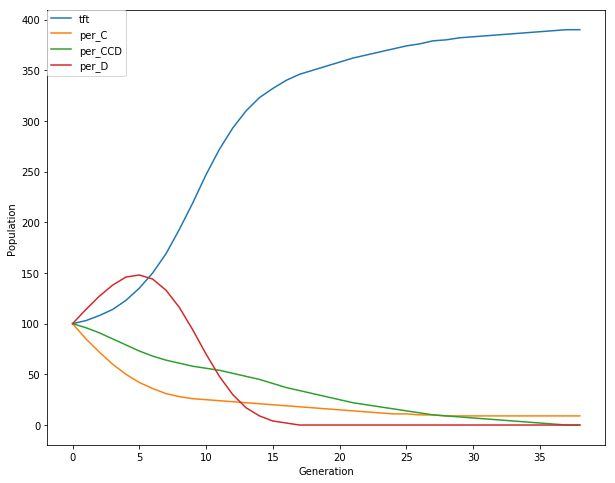

In [19]:
class Tft(Strategy):
    def __init__(self):
        super().__init__()
        self.name = "tft"
        self.hisPast=""
        
    def getAction(self,tick):
        return 'C' if (tick==0) else self.hisPast[-1]

    def clone(self):
        return Tft()

    def update(self,my,his):
        self.hisPast+=his
    
    
class Spiteful(Strategy):
    def __init__(self):
        super().__init__()
        self.name = "spiteful"
        self.hisPast=""
        self.myPast=""
        
    def getAction(self,tick):
        if (tick==0):
                return 'C'
        if (self.hisPast[-1]=='D' or self.myPast[-1]=='D') :
            return 'D'
        else :
            return 'C'

    def clone(self):
        return Spiteful()

    def update(self,my,his):
        self.myPast+=my
        self.hisPast+=his


eco = Ecological(g, [Periodic('C'),Periodic('D'),Periodic('CCD'),Tft()])
eco.run()
plt.figure(figsize=(10,8))    # pour définir la taille de la figure
eco.drawPlot()
#eco.tournament.matrix
#plt.savefig("toto.png")
#eco.historic
# DANS CETTE EXPERIENCE, ALL_D GAGNE LE TOURNOI, MAIS C'EST TFT QUI GAGNE LA COMPETITION ECOLOGIQUE

In [20]:
# Accès aux données des DataFrame

# Attention ! avec un dataframe df
# chaque colonne nommée peut etre utilisée comme attribut
# Si on met un seul crochet, c'est une colonne
# donc tournoi.Total et tournoi['Total'] c'est pareil
# 
# si on met des crochets directs c'est df[Col][Lig]
# que l'on peut donc aussi écrire df.Col[lig]
# Si on utilise les fonctions loc, iloc et at, c'est df.iloc[lig,col]
# donc tournoi['Total'][1] est équivalent à tournoi.iloc[1,4]
# Par ailleurs, par défaut le dataframe utilise des entiers comme index
# dans iloc, on met des index ... sauf si on utilise la notation a:b auquel cas ce sont des adresses relatives

tournoi=eco.tournament.matrix
#print("--- La matrice complète du tournoi triée")
#print(tournoi) 
#print("--- Les gagnants du tournoi")
#print(tournoi['Total']) 
#print("--- Les 3 premiers gagnants du tournoi")
#print(tournoi['Total'][0:3])
#print("--- Les gagnants qui ont fait plus de 10000")
#print(tournoi['Total'][tournoi['Total']>10000])


evol=eco.historic
#print("--- L'historique complet trié")
#print(evol)
#print("--- Les populations finales classées")
#print(evol.iloc[eco.generation])
#print(evol.iloc[-1])
#print(evol.tail(1))
#print("--- Les 2 premiers de la compétition")
#print(evol.iloc[-1][0:2]) 
#print("--- Les derniers survivants")
#print(evol.iloc[-1][evol.iloc[-1]>0]) 
#print("--- la ligne quand tft=340 ?")
#evol.loc[evol.tft==340]
#print("--- A quel indice per_C et per_D se croisent ?")
#print(evol.loc[evol.per_C > evol.per_D].loc[evol.per_D!=0])
# Ecrire l'équivalent de select * from evol where ...
#evol.loc[(evol.tft>300) & (evol.per_D>0)]
# depuis pandas0.13  ... s'écrit
#evol.query('tft>300 & per_D>0')

#eco.drawPlot()


# La famille Memory

In [21]:
class Mem(Strategy):
    def __init__(self, x, y, genome, name=None):
        self.name = name
        self.x = x
        self.y = y
        self.genome = genome
        if (name == None): #Nom par défaut si l'utilisateur ne le définit pas
            self.name = genome
        self.myMoves = [] #contains my x last moves
        self.itsMoves = [] #contains its y last moves

    def clone(self):
        return Mem(self.x, self.y, self.genome, self.name)

    def getAction(self, tick):
        if (tick < max(self.x, self.y)):
            return self.genome[tick]
        cpt = 0
        for i in range(self.x-1,-1,-1):
            cpt*=2
            if (self.myMoves[i] == 'D'):
                cpt+=1
        for i in range(self.y-1,-1,-1):
            cpt*=2
            if (self.itsMoves[i] == 'D'):
                cpt+=1
        cpt += max(self.x, self.y)
        return self.genome[cpt]

    def update(self, myMove, itsMove):
        if (self.x > 0):
            if(len(self.myMoves) == self.x):
                del self.myMoves[0]
            self.myMoves.append(myMove)
        if (self.y > 0):
            if(len(self.itsMoves) == self.y):
                del self.itsMoves[0]
            self.itsMoves.append(itsMove)
            
            
#Mem(0,0,'C','allc')
#Mem(0,0,'D','alld')
#Mem(1,0,'cDC','percd')
#Mem(1,0,'dDC','perdc')
#Mem(0,1,'cCD','tft')
#Mem(0,1,'dCD','mistrust')
#Mem(1,1,'cCDDD','spiteful')
#Mem(1,1,'cCDDC','pavlov')
#Mem(0,2,'ccCCCD','tf2t')
#Mem(0,2,'ccCDDD','hard_tft')
#Mem(1,2,'ccCCCDCDDD','slow_tft')
#Mem(1,2,'ccCDCDDCDD','winner12') 
#Mem(1,2,'','tft_spiteful')
#Mem(1,2,'ccCDDDDDDD','spiteful_cc')

# Petit test d'équivalence

bag1 = [Periodic('C'),Periodic('D'),Tft(),Spiteful(),Periodic('CD'),Periodic('DC')]
t1=Tournament(g,bag1,100)
t1.run()
print(t1.matrix)

bag2 = [Mem(0,0,'C','allc'),Mem(0,0,'D','alld'),Mem(0,1,'cCD','tft'),
        Mem(1,1,'cCDDD','spiteful'),Mem(1,0,'cDC','percd'),Mem(1,0,'dDC','perdc')]
t2=Tournament(g,bag2,100)
t2.run()
print(t2.matrix)


          spiteful  tft  per_D  per_CD  per_DC  per_C  Total
spiteful       300  300     99     297     299    300   1595
tft            300  300     99     248     250    300   1497
per_D          104  104    100     300     300    500   1408
per_CD          57  253     50     200     250    400   1210
per_DC          54  250     50     250     200    400   1204
per_C          300  300      0     150     150    300   1200
          spiteful  tft  alld  percd  perdc  allc  Total
spiteful       300  300    99    297    299   300   1595
tft            300  300    99    248    250   300   1497
alld           104  104   100    300    300   500   1408
percd           57  253    50    200    250   400   1210
perdc           54  250    50    250    200   400   1204
allc           300  300     0    150    150   300   1200


## Les générer toutes
Pour une famille Mem(x,y), le génome est de taille `max(x,y)`pour l'amorce plus `2^(x+y)` pour toutes les situations s du passé sur `x` coups de l'un et `y` coups de l'autre. Il y a donc `2^(max(x,y)+2^(x+y))` strategies à générer. Pour obtenir tous ces éléments il suffit donc de calculer toutes les instanciations possibles de C et D dans le génome, ce qui se fait, encore une fois , avec un produit cartésien.

| famille  | longueur | nombre   |
|         :-:        :-:         |
| mem(0,1) | 1+2^1 = 3        | 2^3 = 8 |
| mem(1,0) | 1+2^1 = 3        | 2^3 = 8 |
| mem(1,1) | 1+2^2 = 5        | 2^5 = 32 |
| mem(2,0) | 2+2^2 = 6        | 2^6 = 64 |
| mem(1,2) | 2+2^3 = 10       | 2^10 = 1024 |
| mem(2,1) | 2+2^3 = 10       | 2^10 = 1024 |
| mem(2,2) | 2+2^4 = 18       | 2^18 = 262144 |

In [31]:
def getAllMemory(x,y):
    if (x+y > 4):
        return "Pas calculable"
    len_genome = max(x,y)+2**(x+y)
    permut = [p for p in itertools.product(['C','D'], repeat=len_genome)]
    genomes = [''.join(p) for p in permut]
    return [Mem(x,y,gen) for gen in genomes]


print("Dans Mem(1,1) il y a "+ str(len(getAllMemory(1,1))) + " stratégies")

Dans Mem(1,1) il y a 32 stratégies


## La compétition des Mem(1,1)

In [2]:


bag3=getAllMemory(1,1)
e2=Ecological(g,bag3)
e2.run()
e2.drawPlot(None,4)
evol=e2.historic
print(evol.iloc[-1][evol.iloc[-1]>0])
# Seules 4 survivent : mem11_cCDDD-spite 2126  , mem11_cCDCD-tft 701 , mem11_cCDDC-pavlov 214 , mem11_cCDCC 158

NameError: name 'getAllMemory' is not defined

# Battre une classe mem
Il est très souvent (toujours ?) possible de trouver une stratégie capable de battre toutes celles d'une classe données dans une classe d'ordre supérieur. Par exemple trouver une `Mem(2,2)` capable de gagner dans l'ensemble des `Mem(1,1)`. La manière la plus simple d'en trouver une consiste à calculer un certain nombre de fois un génotype aléatoire d'une `Mem(2,2)`, de l'évaluer dans `Mem(1,1)`, de regarder son classement et de ne conserver que celle qui a obtenu le meilleur classement. C'est le cas de `Mem(2,2,'CCCCDDDCCDCDDDDDDD')`.

In [ ]:
class FindBest:
    def __init__(self, game):
        self.game = game

    def generate_random_genotype(self, x, y):
        N = max(x,y) + 2**(x+y)
        genotype = ""
        for i in range (N):
            genotype += random.choice(self.game.actions)
        return genotype

    def random_selection(self, x, y, nb_tests, soupe):
        d = dict()
        for n in range(nb_tests):
            genotype = self.generate_random_genotype(x,y)
            strat = Mem(x,y,genotype)
            eco = Ecological(self.game, soupe+[strat])
            eco.run()
            d[genotype] = eco.historic.columns.tolist().index(strat.name)
        return sorted(d.items(), key=lambda t: t[1])


dip =[(3,3),(0,5),(5,0),(1,1)]
g = Game(dip,['C','D'])
gen = FindBest(g)
soupe = getAllMemory(1,1)
print(gen.random_selection(2,2,10,soupe)[1:3])

In [ ]:
## Battre Mem(1,1) par Mem(2,2)

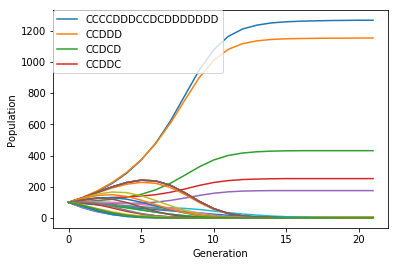

CCCCDDDCCDCDDDDDDD    1267
CCDDD                 1153
CCDCD                  431
CCDDC                  252
CCDCC                  175
CCCCC                    5
CCCCD                    5
CCCDC                    5
CCCDD                    5
Name: 21, dtype: object


In [33]:
bag3=getAllMemory(1,1)
e2=Ecological(g,bag3+[Mem(2,2,'CCCCDDDCCDCDDDDDDD')])
e2.run()
e2.drawPlot(None,4)
evol=e2.historic
print(evol.iloc[-1][evol.iloc[-1]>0])

## Battre Mem(1,2) par une Mem(2,2)

# Bibliographie

- Robert Axelrod, The Evolution of Cooperation (New York: Basic Books, 1984).
- JP Delahaye et P Mathieu. Des surprises dans le monde de la coopération. Pour la Science, numéro spécial "Les mathématiques sociales", pp 58-66, Juillet 1999.
- Philippe Mathieu, Jean-Paul Delahaye. [New Winning Strategies for the Iterated Prisoner's Dilemma](http://jasss.soc.surrey.ac.uk/20/4/12.html). J. Artificial Societies and Social Simulation 20(4) (2017)
- Philippe Mathieu, Jean-Paul Delahaye. New Winning Strategies for the Iterated Prisoner's Dilemma. AAMAS 2015: 1665-1666
- Bruno Beaufils, Jean-Paul Delahaye et Philippe Mathieu. Our Meeting with Gradual : A good Strategy for the Itareted Prisoner’s Dilemma, in Intern. Cof. on Artificial Life V (ALIFE V), pp. 159- 165, 16-18 mai 1996, Nara (Japon).
- Martin Nowak et K. Sigmund, TIT for TAT in Heterogeneous Populations, Nature, vol. 355, n° 16, pp. 250-253, janvier 1992.